# Load and explore the nCov2019 dataset (outside Hubei)

In [1]:
ncov_outside_hubei = catalog.load("raw_ncov_outside_hubei")
ncov_outside_hubei

2020-03-18 22:58:19,254 - kedro.io.data_catalog - INFO - Loading data from `raw_ncov_outside_hubei` (CSVDataSet)...


/anaconda3/envs/inauditus/lib/python3.7/site-packages/kedro/io/data_catalog.py:358: DtypeWarning: Columns (0,22,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  result = func()


,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
0,1,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,...,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN
1,2,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,...,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN
2,3,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
3,4,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,...,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN
4,5,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,...,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26028,26723,NaN,NaN,Monteregie Region,Quebec,Canada,1.0,45.383330,-73.100000,point,...,NaN,NaN,NaN,Monteregie Region,NaN,NaN,Quebec,Canada,11,NaN
26029,26724,NaN,NaN,NaN,Quebec,Canada,1.0,54.164720,-71.865100,admin1,...,NaN,NaN,NaN,NaN,NaN,NaN,Quebec,Canada,11,NaN
26030,26725,NaN,NaN,NaN,Quebec,Canada,1.0,54.164720,-71.865100,admin1,...,NaN,NaN,NaN,NaN,NaN,NaN,Quebec,Canada,11,NaN
26031,26726,NaN,NaN,NaN,Quebec,Canada,1.0,54.164720,-71.865100,admin1,...,NaN,NaN,NaN,NaN,NaN,NaN,Quebec,Canada,11,NaN


In [2]:
ncov_outside_hubei.dtypes

ID                           object
age                          object
sex                          object
city                         object
province                     object
country                      object
wuhan(0)_not_wuhan(1)       float64
latitude                    float64
longitude                   float64
geo_resolution               object
date_onset_symptoms          object
date_admission_hospital      object
date_confirmation            object
symptoms                     object
lives_in_Wuhan               object
travel_history_dates         object
travel_history_location      object
reported_market_exposure     object
additional_information       object
chronic_disease_binary      float64
chronic_disease              object
source                       object
sequence_available           object
outcome                      object
date_death_or_discharge      object
notes_for_discussion         object
location                     object
admin3                      

`date_onset_symptoms` and `date_admission_hospital` are too sparse.

In [3]:
ncov_outside_hubei.date_onset_symptoms.value_counts(dropna=False)

NaN            25077
22.01.2020        44
25.01.2020        42
24.01.2020        42
26.01.2020        38
               ...  
01.31.2020         1
01.01.2020         1
11.03.2020         1
29.12.2019         1
08.03.20202        1
Name: date_onset_symptoms, Length: 75, dtype: int64

In [4]:
ncov_outside_hubei.date_admission_hospital.value_counts(dropna=False)

NaN           25148
30.01.2020       46
22.01.2020       44
23.01.2020       41
31.01.2020       41
              ...  
12.01.2020        1
03.01.2020        1
09.01.2020        1
14.01.2020        1
16.02.2020        1
Name: date_admission_hospital, Length: 70, dtype: int64

In [5]:
ncov_outside_hubei.date_confirmation.value_counts(dropna=False)

12.03.2020                 1242
05.03.2020                 1113
07.03.2020 - 10.03.2020    1097
29.01.2020                 1090
04.03.2020                  995
                           ... 
17.01.2020                    1
12.01.2020                    1
19.01.2020                    1
06.01.2020                    1
15.01.2020                    1
Name: date_confirmation, Length: 69, dtype: int64

## Type date columns

In [6]:
import pandas as pd

for column in ncov_outside_hubei.columns:
    if column.startswith("date"):
        ncov_outside_hubei[column] = pd.to_datetime(ncov_outside_hubei[column], errors="coerce", dayfirst=True)

## Drop rows where confirmation date is after death or discharge date

TODO(deepyaman): Handle cases where confirmation date is after death or discharge date.

In [7]:
ncov_outside_hubei[ncov_outside_hubei.date_confirmation > ncov_outside_hubei.date_death_or_discharge]

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,...,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials
162,178,NaN,NaN,Suihua City,Heilongjiang,China,1.0,46.90084,126.6487,admin2,...,died,2020-01-23,NaN,NaN,NaN,Suihua City,Heilongjiang,China,231200,NaN
623,654,32,male,Kathmandu,NaN,Nepal,1.0,27.71720,85.3240,point,...,discharged,2020-01-17,NaN,Kathmandu,NaN,NaN,Province No.-3,Nepal,3,NaN
5020,5143,38,NaN,Beijing,Beijing,China,1.0,40.18535,116.4151,admin2,...,discharged,2020-02-02,NaN,NaN,NaN,Beijing,Beijing,China,110100,NaN
6017,6352,60,female,Cebu City,Cebu,Philippines,1.0,10.37893,123.7763,point,...,discharged,2020-01-30,NaN,Cebu City,NaN,NaN,Cebu,Philippines,25,NaN
11714,12102,NaN,NaN,King County,Washington,United States,1.0,47.49133,-121.8040,admin2,...,died,2020-03-06,NaN,NaN,NaN,King County,Washington,United States,2974,NaN
11718,12106,70-79,male,King County,Washington,United States,1.0,47.49133,-121.8040,admin2,...,died,2020-03-02,NaN,NaN,NaN,King County,Washington,United States,2974,NaN
14411,14840,50-59,male,Seattle,Washington,United States,1.0,47.60972,-122.3330,point,...,died,2020-02-26,NaN,Seattle,NaN,King County,Washington,United States,2974,NaN
17467,17918,95,female,Macquarie Park,New South Wales,Australia,1.0,-33.77720,151.1241,point,...,death,2020-03-03,NaN,Macquarie Park,NaN,NaN,New South Wales,Australia,5,NaN
18879,19341,70-79,male,King County,Washington,United States,1.0,47.49133,-121.8040,admin2,...,died,2020-03-01,NaN,Seattle,NaN,King County,Washington,United States,2974,NaN
18915,19377,50-59,male,King County,Washington,United States,1.0,47.49133,-121.8040,admin2,...,died,2020-02-26,NaN,NaN,NaN,King County,Washington,United States,2974,NaN


In [8]:
ncov_outside_hubei_filtered = ncov_outside_hubei[
    ~(ncov_outside_hubei.date_confirmation > ncov_outside_hubei.date_death_or_discharge)
    & ncov_outside_hubei.date_confirmation.notna()
]

# Get data in the right format

In [9]:
start_dates = ncov_outside_hubei_filtered.date_confirmation
end_dates = ncov_outside_hubei_filtered.date_death_or_discharge
pd.DataFrame({"start_dates": start_dates, "end_dates": end_dates}).describe()

,start_dates,end_dates
count,24432,155
unique,64,44
top,2020-03-12 00:00:00,2020-02-18 00:00:00
freq,1242,11
first,2020-01-06 00:00:00,2020-01-15 00:00:00
last,2020-03-17 00:00:00,2020-03-14 00:00:00


In [10]:
from datetime import datetime

last_load_version = datetime.strptime(
    catalog.datasets.raw_ncov_outside_hubei.get_last_load_version(),
    "%Y-%m-%dT%H.%M.%S.%fZ",
)
last_load_version

datetime.datetime(2020, 3, 18, 1, 31, 42)

In [11]:
from lifelines.utils import datetimes_to_durations

T, E = datetimes_to_durations(
    start_dates, end_dates, fill_date=last_load_version, freq="D"
)
pd.DataFrame({"T": T, "E": E})[E]

,T,E
18,3.0,True
31,8.0,True
130,4.0,True
248,10.0,True
523,18.0,True
...,...,...
21462,0.0,True
22198,19.0,True
22199,19.0,True
22200,18.0,True


In [12]:
# pd.DataFrame({"T": T, "E": E}).groupby("E")["T"].value_counts()
with pd.option_context("display.max_rows", -1):
    print(pd.DataFrame({"T": T, "E": E}).groupby("E")["T"].value_counts())


E      T       1242
False  6.0     1112
       13.0    1087
       49.0     991
       14.0     974
       15.0     861
       44.0     820
       16.0     807
       47.0     797
       42.0     744
       43.0     716
       51.0     709
       46.0     701
       12.0     669
       45.0     657
       4.0      656
       9.0      605
       41.0     521
       40.0     519
       39.0     508
       7.0      487
       5.0      481
       17.0     458
       19.0     452
       20.0     441
       52.0     422
       3.0      419
       48.0     388
       8.0      386
       11.0     375
       21.0     351
       2.0      345
       10.0     298
       25.0     286
       53.0     251
       34.0     240
       18.0     225
       22.0     216
       32.0     210
       23.0     200
       31.0     181
       50.0     180
       33.0     158
       24.0     147
       30.0     135
       1.0      129
       54.0     111
       29.0      94
       37.0      88
       55.0      84

## Drop long durations

[1st known case of coronavirus traced back to November in China](https://www.livescience.com/first-case-coronavirus-found.html), so durations longer than that indicate data quality issues.

In [13]:
duration_filter = T < 365
E = E[duration_filter]
T = T[duration_filter]

In [14]:
# Issue fixed between `2020-03-04T17.15.00.000Z` and `2020-03-18T01.31.42.000Z`.
assert duration_filter.all()

# Analyze survival!

In [15]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(T, E)

2020-03-18 22:58:20,243 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 24432 total observations, 24277 right-censored observations>

In [16]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,0.999509
1.0,0.999181
2.0,0.999140
3.0,0.998806
4.0,0.998594
...,...
58.0,0.991244
59.0,0.991244
61.0,0.991244


In [17]:
kmf.cumulative_density_

,KM_estimate
timeline,
0.0,0.000491
1.0,0.000819
2.0,0.000860
3.0,0.001194
4.0,0.001406
...,...
58.0,0.008756
59.0,0.008756
61.0,0.008756


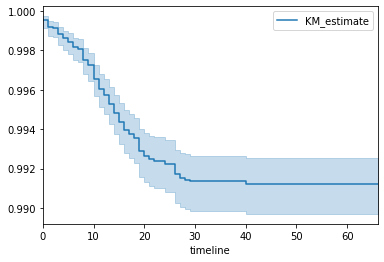

In [18]:
kmf.plot_survival_function()

/anaconda3/envs/inauditus/lib/python3.7/site-packages/lifelines/fitters/__init__.py:941: StatisticalWarning: The diagonal of the variance_matrix_ has negative values. This could be a problem with GeneralizedGammaFitter's fit to the data.

It's advisable to not trust the variances reported, and to be suspicious of the fitted parameters too. Perform plots of the cumulative hazard to help understand the latter's bias.

To fix this, try specifying an `initial_point` kwarg in `fit`.

  warnings.warn(warning_text, utils.StatisticalWarning)
/anaconda3/envs/inauditus/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/anaconda3/envs/inauditus/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colN

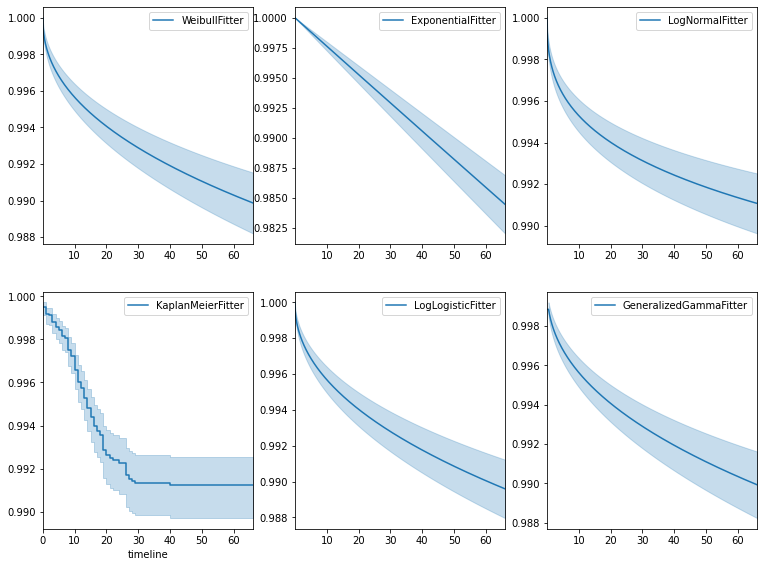

In [19]:
import matplotlib.pyplot as plt
from lifelines import *

fig, axes = plt.subplots(2, 3, figsize=(12.8, 9.6))

kmf = KaplanMeierFitter().fit(T, E, label='KaplanMeierFitter')

T[T == 0] += 1e-6  # Other models do not allow for non-positive durations; add a small positive value to zero elements.

wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentialFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
ggf = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')

wbf.plot_survival_function(ax=axes[0][0])
exf.plot_survival_function(ax=axes[0][1])
lnf.plot_survival_function(ax=axes[0][2])
kmf.plot_survival_function(ax=axes[1][0])
llf.plot_survival_function(ax=axes[1][1])
ggf.plot_survival_function(ax=axes[1][2])